<a href="https://colab.research.google.com/github/Chiragks-1/mlops-zoomcamp/blob/main/MLOPSintro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd


In [56]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [58]:
df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-01.parquet")

In [59]:
old_len = len(df)

In [61]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [62]:
df.lpep_pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.lpep_dropoff_datetime = pd.to_datetime(df.dropOff_datetime	)

<ipython-input-62-b7894565e813>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.lpep_pickup_datetime = pd.to_datetime(df.pickup_datetime)
<ipython-input-62-b7894565e813>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.lpep_dropoff_datetime = pd.to_datetime(df.dropOff_datetime	)


In [63]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime


In [64]:
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

In [43]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [44]:
df.duration.mean()

19.167224093791006

In [12]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
5,2,2022-02-01 00:26:19,2022-02-01 00:26:28,N,5.0,197,197,1.0,0.00,8.0,...,0.0,0.00,0.0,None,0.3,8.30,1.0,2.0,0.00,0.150000
30,2,2022-02-01 01:06:21,2022-02-01 01:15:30,N,5.0,92,192,1.0,2.48,15.0,...,0.0,4.59,0.0,None,0.3,19.89,1.0,2.0,0.00,9.150000
32,2,2022-01-31 15:11:04,2022-01-31 15:11:08,N,5.0,42,42,1.0,0.00,11.0,...,0.0,0.00,0.0,None,0.3,11.30,1.0,2.0,0.00,0.066667
87,2,2022-02-01 06:19:39,2022-02-01 06:47:56,N,5.0,129,239,1.0,6.63,40.0,...,0.0,0.00,0.0,None,0.3,43.05,2.0,2.0,2.75,28.283333
92,2,2022-02-01 06:59:54,2022-02-01 07:00:25,N,5.0,132,132,1.0,0.00,46.0,...,0.0,0.00,0.0,None,0.3,46.30,2.0,2.0,0.00,0.516667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61913,2,2022-02-28 22:54:22,2022-02-28 22:54:46,N,5.0,171,171,1.0,0.00,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.00,0.400000
61924,2,2022-02-28 22:53:20,2022-02-28 22:54:10,N,5.0,94,264,1.0,0.00,50.0,...,0.0,0.00,0.0,None,0.3,50.30,1.0,2.0,0.00,0.833333
61942,2,2022-02-28 22:05:50,2022-02-28 22:26:32,N,5.0,181,186,1.0,5.31,75.0,...,0.0,2.50,0.0,None,0.3,80.55,1.0,2.0,2.75,20.700000
61944,2,2022-02-28 22:05:33,2022-02-28 22:05:43,N,5.0,177,177,1.0,0.08,25.0,...,0.0,0.00,0.0,None,0.3,25.30,1.0,2.0,0.00,0.166667


<ipython-input-45-2774fa1cf306>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

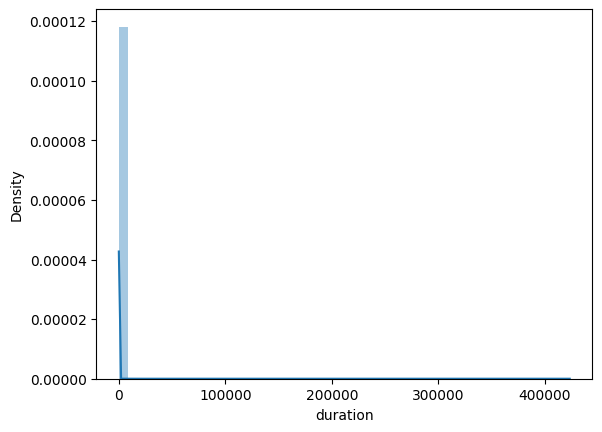

In [45]:
sns.distplot(df.duration)

In [13]:
df.duration.describe()


count    2627.000000
mean       17.806484
std        86.340650
min         0.000000
25%         0.100000
50%         4.600000
75%        14.883333
max      1436.650000
Name: duration, dtype: float64

In [65]:
df=df[(df.duration >= 1) & (df.duration <= 60)].copy()

In [66]:
old_len - ((df.duration >= 1) & (df.duration <= 60)).sum()

44286

In [67]:
df.isnull().sum()/len(df)

dispatching_base_num      0.000000
pickup_datetime           0.000000
dropOff_datetime          0.000000
PUlocationID              0.835273
DOlocationID              0.133270
SR_Flag                   1.000000
Affiliated_base_number    0.000697
duration                  0.000000
dtype: float64

In [77]:
df[categorical]=df[['PUlocationID', 'DOlocationID']].fillna(-1).astype('int')

In [78]:
categorical = ['PUlocationID', 'DOlocationID']
numerical = ['trip_distance']

In [79]:
train_dicts=df[categorical].to_dict(orient='records')


In [80]:
df[categorical].astype('str')

,PUlocationID,DOlocationID
0,-1,-1
1,-1,-1
3,-1,72
4,-1,61
5,-1,71
...,...,...
1154107,7,7
1154108,44,91
1154109,171,171
1154110,15,15


In [81]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [82]:
X_train.shape

(1109826, 2)

In [26]:
#target = 'duration'
#y_train = df[target].values



In [83]:
len(dv.feature_names_)

2

In [85]:
y_train=df.duration.values

In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred = lr.predict(X_train)

In [88]:
mean_squared_error(y_train, y_pred, squared=False)

11.415432830521663

In [90]:
categorical = ['PUlocationID', 'DOlocationID']

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')

    return df

In [91]:
df_val=read_data("https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-02.parquet")

In [92]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [93]:
X_val = dv.transform(val_dicts)

In [94]:
y_pred = lr.predict(X_val)

In [95]:
y_val = df_val.duration.values

In [96]:
mean_squared_error(y_val, y_pred, squared=False)

11.992306570398757

<ipython-input-33-5fdabbf3bec2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
<ipython-input-33-5fdabbf3bec2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


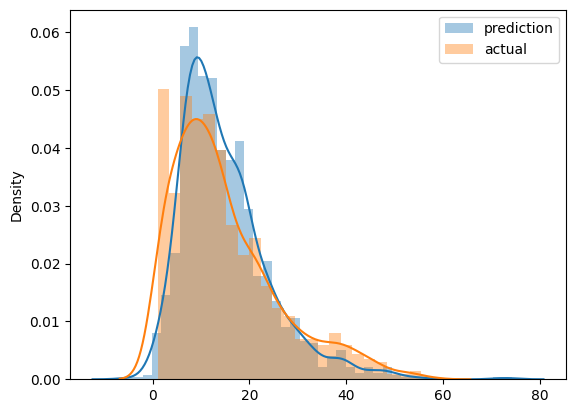

In [33]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()